# London Boroughs and Crimes
#### Capstone Project - Coursera


##### Introduction

London, the largest of England, has diverse range of people and cultures. London has 32 districts, commonly known as London Boroughs. As a resident of this city, I decided to use London in my project. In this project, I explore the different boroughs and the total crimes in the areas. Such information is always useful for people looking to relocate to London. We always tend to see the safer areas to raise our family. Further I explore the neighbourhoods in the safest borough and cluster the neighbourhoods using K-means clustering. 

##### Data

I have used the data from https://data.london.gov.uk/dataset/recorded_crime_summary. The data provides the number of crimes in each borough and the various crime categories between June 2017 to May 2019. A csv file was provided in the website. 

I have scraped the geographical co-ordinates of the London Boroughs from https://en.wikipedia.org/wiki/List_of_London_boroughs using Beautiful soup.

I used Foursquare API to get the most common venues of the safest borough of London. 

##### Steps



In [1]:
#Import the necessary libraries

import pandas as pd
import numpy as np 
import matplotlib as plot
import matplotlib.pyplot as plt

%matplotlib inline
import json
import folium
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


from IPython.display import Image
from IPython.core.display import HTML

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

!pip install beautifulsoup
!pip install lxml
!pip install html5lib
!pip install requests

from bs4 import BeautifulSoup
import requests

Solving environment: ...working... done

# All requested packages already installed.

  Using cached https://files.pythonhosted.org/packages/1e/ee/295988deca1a5a7accd783d0dfe14524867e31abb05b6c0eeceee49c759d/BeautifulSoup-3.2.1.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\leo26\AppData\Local\Temp\pip-install-0ikyhw_y\beautifulsoup\setup.py", line 22
        print "Unit tests have failed!"
                                      ^
    SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Unit tests have failed!")?
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\leo26\AppData\Local\Temp\pip-install-0ikyhw_y\beautifulsoup\


The data with the boroughs and the crimes in every month between June 2017 and May 2019 was downloaded as a csv file from https://data.london.gov.uk/dataset/recorded_crime_summary. Column names were renamed. 

In [2]:
# Reading the csv file
Borough_crime = pd.read_csv("London Borough Level Crime.csv")
Borough_crime.head()



,MajorText,MinorText,LookUp_BoroughName,201706,201707,201708,201709,201710,201711,201712,...,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905
0,Arson and Criminal Damage,Arson,Barking and Dagenham,14,2,5,8,7,7,4,...,5,3,8,5,1,5,2,5,5,12
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,150,143,169,134,132,108,119,...,101,107,131,105,89,97,127,137,131,133
2,Burglary,Burglary - Business and Community,Barking and Dagenham,19,42,30,25,23,27,21,...,18,33,32,39,33,44,24,29,27,22
3,Burglary,Burglary - Residential,Barking and Dagenham,71,95,83,81,122,88,124,...,84,99,94,106,164,114,107,99,96,115
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,7,1,6,6,5,6,...,7,9,6,7,2,5,1,6,4,8


In [3]:
# Reading the column names
Borough_crime.columns

Index(['MajorText', 'MinorText', 'LookUp_BoroughName', '201706', '201707',
       '201708', '201709', '201710', '201711', '201712', '201801', '201802',
       '201803', '201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', '201902', '201903', '201904',
       '201905'],
      dtype='object')

In [4]:
# Renaming the columns
Borough_crime.rename(columns={'MajorText':'Broad_crime_category','MinorText':'Crime_Category', 'LookUp_BoroughName':'Borough','201706':'June 2017','201707':'July 2017',
                              '201708':'Aug 2017','201709':'Sept 2017','201710':'Oct 2017','201711':'Nov 2017','201712':'Dec 2017','201801':'Jan 2018',
                              '201802':'Feb 2018','201803':'Mar 2018','201804':'April 2018','201805':'May 2018','201806':'June 2018','201807':'July 2018',
                              '201808':'Aug 2018','201809':'Sept 2018','201810':'Oct 2018','201811':'Nov 2018','201812':'Dec 2018','201901':'Jan 2019',
                              '201902':'Feb 2019','201903':'Mar 2019','201904':'April 2019','201905':'May 2019'}, inplace = True)
Borough_crime

,Broad_crime_category,Crime_Category,Borough,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,...,Aug 2018,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019
0,Arson and Criminal Damage,Arson,Barking and Dagenham,14,2,5,8,7,7,4,...,5,3,8,5,1,5,2,5,5,12
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,150,143,169,134,132,108,119,...,101,107,131,105,89,97,127,137,131,133
2,Burglary,Burglary - Business and Community,Barking and Dagenham,19,42,30,25,23,27,21,...,18,33,32,39,33,44,24,29,27,22
3,Burglary,Burglary - Residential,Barking and Dagenham,71,95,83,81,122,88,124,...,84,99,94,106,164,114,107,99,96,115
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,7,1,6,6,5,6,...,7,9,6,7,2,5,1,6,4,8
5,Drug Offences,Possession of Drugs,Barking and Dagenham,40,63,56,47,81,85,56,...,70,72,64,75,70,79,73,117,100,83
6,Miscellaneous Crimes Against Society,Dangerous Driving,Barking and Dagenham,0,1,3,2,0,0,2,...,2,1,0,2,1,1,0,1,1,0
7,Miscellaneous Crimes Against Society,"Disclosure, Obstruction, False or Misleading S...",Barking and Dagenham,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,Miscellaneous Crimes Against Society,Forgery or Use of Drug Prescription,Barking and Dagenham,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
9,Miscellaneous Crimes Against Society,Fraud or Forgery Associated with Driver Records,Barking and Dagenham,0,0,0,0,1,1,0,...,0,0,1,0,0,2,0,0,0,0


In [5]:
#Finding the total of the crimes in the Boroughs in every month
Borough_Crime_total = Borough_crime.groupby(['Borough'], as_index=False).sum()
Borough_Crime_total

,Borough,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,...,Aug 2018,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019
0,Barking and Dagenham,1582,1719,1607,1553,1634,1526,1464,1506,1425,...,1459,1464,1581,1559,1543,1573,1559,1709,1676,1792
1,Barnet,2222,2386,2210,2156,2414,2463,2085,2259,2118,...,2243,2263,2548,2562,2420,2406,2537,2826,2540,2495
2,Bexley,1290,1256,1217,1303,1424,1345,1186,1262,1096,...,1243,1261,1339,1405,1465,1532,1343,1433,1485,1568
3,Brent,2495,2538,2531,2541,2790,2677,2438,2522,2360,...,2507,2551,2724,2728,2377,2485,2366,2653,2431,2514
4,Bromley,1918,1900,1859,1811,1850,2006,1820,2008,1709,...,1853,1940,1971,1989,1989,1992,1948,2101,1952,2071
5,Camden,3392,3521,3382,3299,3615,3414,2956,3102,2769,...,2858,2891,3053,3131,2956,3053,3165,3449,3239,3223
6,Croydon,2613,2694,2605,2523,2529,2569,2549,2611,2417,...,2578,2513,2803,2621,2641,2630,2568,2815,2606,2749
7,Ealing,2470,2555,2293,2248,2648,2555,2122,2301,2074,...,2270,2417,2548,2596,2286,2542,2459,2886,2498,2556
8,Enfield,2130,2201,2049,2051,2303,2292,2053,2194,2085,...,2283,2291,2438,2488,2367,2505,2343,2580,2408,2384
9,Greenwich,2121,2278,2106,2117,2326,2047,1988,2055,1774,...,2084,2238,2279,2237,2259,2236,2049,2389,2349,2365


In [6]:
#Finding the total crime per borough in all the months between June 2017 and May 2019
Borough_Crime_total['Total_per_crime'] = Borough_Crime_total.sum(axis=1)
Borough_Crime_total

,Borough,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,...,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019,Total_per_crime
0,Barking and Dagenham,1582,1719,1607,1553,1634,1526,1464,1506,1425,...,1464,1581,1559,1543,1573,1559,1709,1676,1792,37657
1,Barnet,2222,2386,2210,2156,2414,2463,2085,2259,2118,...,2263,2548,2562,2420,2406,2537,2826,2540,2495,57007
2,Bexley,1290,1256,1217,1303,1424,1345,1186,1262,1096,...,1261,1339,1405,1465,1532,1343,1433,1485,1568,31734
3,Brent,2495,2538,2531,2541,2790,2677,2438,2522,2360,...,2551,2724,2728,2377,2485,2366,2653,2431,2514,61230
4,Bromley,1918,1900,1859,1811,1850,2006,1820,2008,1709,...,1940,1971,1989,1989,1992,1948,2101,1952,2071,46451
5,Camden,3392,3521,3382,3299,3615,3414,2956,3102,2769,...,2891,3053,3131,2956,3053,3165,3449,3239,3223,75318
6,Croydon,2613,2694,2605,2523,2529,2569,2549,2611,2417,...,2513,2803,2621,2641,2630,2568,2815,2606,2749,62458
7,Ealing,2470,2555,2293,2248,2648,2555,2122,2301,2074,...,2417,2548,2596,2286,2542,2459,2886,2498,2556,58104
8,Enfield,2130,2201,2049,2051,2303,2292,2053,2194,2085,...,2291,2438,2488,2367,2505,2343,2580,2408,2384,55253
9,Greenwich,2121,2278,2106,2117,2326,2047,1988,2055,1774,...,2238,2279,2237,2259,2236,2049,2389,2349,2365,52078


In [7]:
Borough_crime.describe()

,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,...,Aug 2018,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019
count,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,...,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,44.402270,46.646910,44.300757,43.015763,46.080706,45.486129,41.604666,43.467844,39.305801,42.353720,...,43.665826,43.440731,46.751576,46.941992,45.221942,45.679067,44.435057,49.517024,47.163934,47.740858
std,87.290911,92.058075,86.497532,83.118921,89.693800,88.942736,86.829377,85.434820,77.599305,84.979918,...,87.826517,87.030409,94.750138,98.436870,102.426245,99.219476,100.848269,111.126949,109.022451,105.775271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,42.000000,46.000000,44.750000,43.750000,45.750000,45.750000,42.000000,44.000000,41.000000,42.000000,...,46.000000,46.750000,51.000000,47.750000,43.000000,49.000000,45.000000,52.750000,49.750000,48.000000
max,966.000000,1147.000000,1051.000000,995.000000,1052.000000,1089.000000,1281.000000,1072.000000,1012.000000,1082.000000,...,1250.000000,1265.000000,1462.000000,1614.000000,1874.000000,1848.000000,1857.000000,1967.000000,2185.000000,2061.000000


Using BeautifulSoup package, I have webscraped the Wikipedia page https://en.wikipedia.org/wiki/List_of_London_boroughs for the geographical co-ordinates of the boroughs

In [8]:
#Get the latitudes and longitudes of the Boroughs
wiki_url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
r = requests.get(wiki_url)
data = r.text
soup = BeautifulSoup(data)
My_table = soup.find('table',{'class':'wikitable sortable'})
#My_table

In [9]:
#We want to skip the first row because they contain headers,hence have added [2:]
rows = My_table.find_all('tr')[1:] 
rows

[<tr>
 <td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
 </td>
 <td>
 </td>
 <td>
 </td>
 <td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
 </td>
 <td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
 </td>
 <td><a class="new" href="/w/index.php?title=Barking_Town_Hall&amp;action=edit&amp;redlink=1" title="Barking Town Hall (page does not exist)">Town Hall</a>, 1 Town Square
 </td>
 <td>13.93
 </td>
 <td>194,352
 </td>
 <td><span class="plainlinks nourlexpansion"><a class="external text" href="//tools.wmflabs.org/geohack/geohack.php?pagename=List_of_London_boroughs&amp;params=51.5607_N_0.1557_E_region:GB_type:city&amp;title=Barking+and+Dagenham"><span class="geo-nondefault"><span class="geo-

In [10]:
#Taking only the columns you need from the table
data = {'Borough':[], 'Co-ordinates':[]}

for row in rows:
    cols = row.find_all('td')
    data['Borough'].append(cols[0].get_text())
    data['Co-ordinates'].append(cols[8].get_text())
   
print(data)


{'Borough': ['Barking and Dagenham [note 1]\n', 'Barnet\n', 'Bexley\n', 'Brent\n', 'Bromley\n', 'Camden\n', 'Croydon\n', 'Ealing\n', 'Enfield\n', 'Greenwich [note 2]\n', 'Hackney\n', 'Hammersmith and Fulham [note 4]\n', 'Haringey\n', 'Harrow\n', 'Havering\n', 'Hillingdon\n', 'Hounslow\n', 'Islington\n', 'Kensington and Chelsea\n', 'Kingston upon Thames\n', 'Lambeth\n', 'Lewisham\n', 'Merton\n', 'Newham\n', 'Redbridge\n', 'Richmond upon Thames\n', 'Southwark\n', 'Sutton\n', 'Tower Hamlets\n', 'Waltham Forest\n', 'Wandsworth\n', 'Westminster\n'], 'Co-ordinates': ['51°33′39″N 0°09′21″E\ufeff / \ufeff51.5607°N 0.1557°E\ufeff / 51.5607; 0.1557\ufeff (Barking and Dagenham)\n', '51°37′31″N 0°09′06″W\ufeff / \ufeff51.6252°N 0.1517°W\ufeff / 51.6252; -0.1517\ufeff (Barnet)\n', '51°27′18″N 0°09′02″E\ufeff / \ufeff51.4549°N 0.1505°E\ufeff / 51.4549; 0.1505\ufeff (Bexley)\n', '51°33′32″N 0°16′54″W\ufeff / \ufeff51.5588°N 0.2817°W\ufeff / 51.5588; -0.2817\ufeff (Brent)\n', '51°24′14″N 0°01′11″E\ufe

In [11]:
Final_table = pd.DataFrame(data)
Final_table.to_csv("Borough Coordinates.csv", index = False)


In [12]:
df = pd.read_csv("Borough Coordinates.csv")
df.head()

,Borough,Co-ordinates
0,Barking and Dagenham [note 1]\n,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet\n,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley\n,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent\n,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley\n,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [13]:
df['Borough'] = df['Borough'].map(lambda x: x.rstrip('\n'))
df.head()

,Borough,Co-ordinates
0,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [14]:
df['Latitude'] = df['Co-ordinates'].str.split('/').str[1]
df['Latitude'].str.split(' ').str[1]
df.drop(['Co-ordinates'],axis=1,inplace=True)
df['Longitude'] = df['Latitude'].str.split(' ').str[2]
df['Latitude'] = df['Latitude'].str.split(' ').str[1]
df

,Borough,Latitude,Longitude
0,Barking and Dagenham [note 1],﻿51.5607°N,0.1557°E﻿
1,Barnet,﻿51.6252°N,0.1517°W﻿
2,Bexley,﻿51.4549°N,0.1505°E﻿
3,Brent,﻿51.5588°N,0.2817°W﻿
4,Bromley,﻿51.4039°N,0.0198°E﻿
5,Camden,﻿51.5290°N,0.1255°W﻿
6,Croydon,﻿51.3714°N,0.0977°W﻿
7,Ealing,﻿51.5130°N,0.3089°W﻿
8,Enfield,﻿51.6538°N,0.0799°W﻿
9,Greenwich [note 2],﻿51.4892°N,0.0648°E﻿


In [15]:
df['Borough'][0] = 'Barking and Dagenham' 
df['Borough'][9] = 'Greenwich'
df['Borough'][11] = 'Hammersmith and Fulham'
df
#Save the table with the geocoordinates as a new csv file
df.to_csv("Boroughs with the Coordinates.csv", index = False)

The wikipedia page did not inlcude the gepgraphical co-ordinates of Heathrow and London City Airports. Hence have included the co-ordinates and saved it as a new csv file. 

In [16]:
#Reading the file with the co-ordinates

df1 = pd.read_csv("Boroughs with the Airport Coordinates.csv")
df1
#Does not include London Heathrow and City Airports
#Have to add London HEATHROW AND cITY aIRPORTS VALUES
#SO ADDED IT IN THE fILE 'bOROUGH WITH THE COORDINATES' AND RE-READING IT AGAIN


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,0.1255
6,Croydon,51.3714,0.0977
7,Ealing,51.5130,0.3089
8,Enfield,51.6538,0.0799
9,Greenwich,51.4892,0.0648


In [17]:
#Both the tables were merged

df_all = pd.merge(df1,Borough_Crime_total, on='Borough')
df_all

,Borough,Latitude,Longitude,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,...,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019,Total_per_crime
0,Barking and Dagenham,51.5607,0.1557,1582,1719,1607,1553,1634,1526,1464,...,1464,1581,1559,1543,1573,1559,1709,1676,1792,37657
1,Barnet,51.6252,0.1517,2222,2386,2210,2156,2414,2463,2085,...,2263,2548,2562,2420,2406,2537,2826,2540,2495,57007
2,Bexley,51.4549,0.1505,1290,1256,1217,1303,1424,1345,1186,...,1261,1339,1405,1465,1532,1343,1433,1485,1568,31734
3,Brent,51.5588,0.2817,2495,2538,2531,2541,2790,2677,2438,...,2551,2724,2728,2377,2485,2366,2653,2431,2514,61230
4,Bromley,51.4039,0.0198,1918,1900,1859,1811,1850,2006,1820,...,1940,1971,1989,1989,1992,1948,2101,1952,2071,46451
5,Camden,51.5290,0.1255,3392,3521,3382,3299,3615,3414,2956,...,2891,3053,3131,2956,3053,3165,3449,3239,3223,75318
6,Croydon,51.3714,0.0977,2613,2694,2605,2523,2529,2569,2549,...,2513,2803,2621,2641,2630,2568,2815,2606,2749,62458
7,Ealing,51.5130,0.3089,2470,2555,2293,2248,2648,2555,2122,...,2417,2548,2596,2286,2542,2459,2886,2498,2556,58104
8,Enfield,51.6538,0.0799,2130,2201,2049,2051,2303,2292,2053,...,2291,2438,2488,2367,2505,2343,2580,2408,2384,55253
9,Greenwich,51.4892,0.0648,2121,2278,2106,2117,2326,2047,1988,...,2238,2279,2237,2259,2236,2049,2389,2349,2365,52078


In [18]:
Borough_crime.Borough.nunique()

33

In [19]:
#Finding the total of the crimes in the Boroughs
Borough_Crime_total = df_all.groupby(['Borough'], as_index=False).sum()
Borough_Crime_total

,Borough,Latitude,Longitude,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,...,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019,Total_per_crime
0,Barking and Dagenham,51.5607,0.1557,1582,1719,1607,1553,1634,1526,1464,...,1464,1581,1559,1543,1573,1559,1709,1676,1792,37657
1,Barnet,51.6252,0.1517,2222,2386,2210,2156,2414,2463,2085,...,2263,2548,2562,2420,2406,2537,2826,2540,2495,57007
2,Bexley,51.4549,0.1505,1290,1256,1217,1303,1424,1345,1186,...,1261,1339,1405,1465,1532,1343,1433,1485,1568,31734
3,Brent,51.5588,0.2817,2495,2538,2531,2541,2790,2677,2438,...,2551,2724,2728,2377,2485,2366,2653,2431,2514,61230
4,Bromley,51.4039,0.0198,1918,1900,1859,1811,1850,2006,1820,...,1940,1971,1989,1989,1992,1948,2101,1952,2071,46451
5,Camden,51.5290,0.1255,3392,3521,3382,3299,3615,3414,2956,...,2891,3053,3131,2956,3053,3165,3449,3239,3223,75318
6,Croydon,51.3714,0.0977,2613,2694,2605,2523,2529,2569,2549,...,2513,2803,2621,2641,2630,2568,2815,2606,2749,62458
7,Ealing,51.5130,0.3089,2470,2555,2293,2248,2648,2555,2122,...,2417,2548,2596,2286,2542,2459,2886,2498,2556,58104
8,Enfield,51.6538,0.0799,2130,2201,2049,2051,2303,2292,2053,...,2291,2438,2488,2367,2505,2343,2580,2408,2384,55253
9,Greenwich,51.4892,0.0648,2121,2278,2106,2117,2326,2047,1988,...,2238,2279,2237,2259,2236,2049,2389,2349,2365,52078


In [20]:
df_all = pd.merge(df1,Borough_crime, on='Borough')
df_all

,Borough,Latitude,Longitude,Broad_crime_category,Crime_Category,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,...,Aug 2018,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019
0,Barking and Dagenham,51.5607,0.1557,Arson and Criminal Damage,Arson,14,2,5,8,7,...,5,3,8,5,1,5,2,5,5,12
1,Barking and Dagenham,51.5607,0.1557,Arson and Criminal Damage,Criminal Damage,150,143,169,134,132,...,101,107,131,105,89,97,127,137,131,133
2,Barking and Dagenham,51.5607,0.1557,Burglary,Burglary - Business and Community,19,42,30,25,23,...,18,33,32,39,33,44,24,29,27,22
3,Barking and Dagenham,51.5607,0.1557,Burglary,Burglary - Residential,71,95,83,81,122,...,84,99,94,106,164,114,107,99,96,115
4,Barking and Dagenham,51.5607,0.1557,Drug Offences,Drug Trafficking,6,7,1,6,6,...,7,9,6,7,2,5,1,6,4,8
5,Barking and Dagenham,51.5607,0.1557,Drug Offences,Possession of Drugs,40,63,56,47,81,...,70,72,64,75,70,79,73,117,100,83
6,Barking and Dagenham,51.5607,0.1557,Miscellaneous Crimes Against Society,Dangerous Driving,0,1,3,2,0,...,2,1,0,2,1,1,0,1,1,0
7,Barking and Dagenham,51.5607,0.1557,Miscellaneous Crimes Against Society,"Disclosure, Obstruction, False or Misleading S...",0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,Barking and Dagenham,51.5607,0.1557,Miscellaneous Crimes Against Society,Forgery or Use of Drug Prescription,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Barking and Dagenham,51.5607,0.1557,Miscellaneous Crimes Against Society,Fraud or Forgery Associated with Driver Records,0,0,0,0,1,...,0,0,1,0,0,2,0,0,0,0


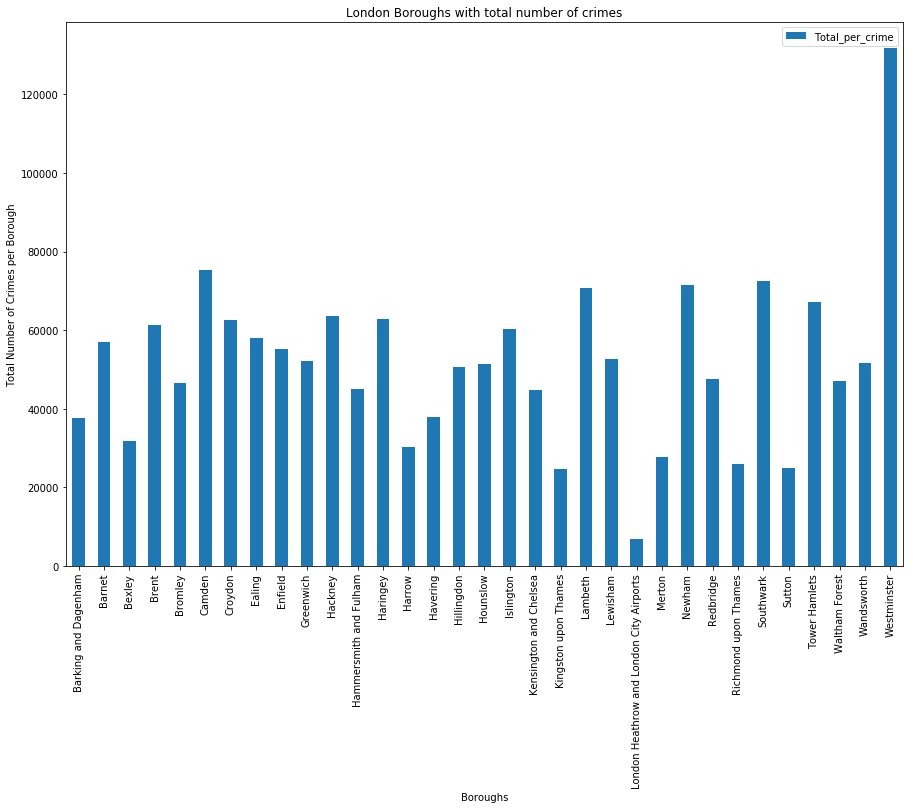

In [21]:
BCT = Borough_Crime_total[['Borough','Total_per_crime']]
BCT.set_index('Borough',inplace=True)

ax = BCT.plot(kind='bar', figsize=(15, 10))

ax.set_ylabel('Total Number of Crimes per Borough') # add to x-label to the plot
ax.set_xlabel('Boroughs') # add y-label to the plot
ax.set_title('London Boroughs with total number of crimes') # add title to the plot

# Creating a function to display the percentage.

for a in ax.patches:
    #ax.annotate(np.round(a.get_height(), decimals = 2), 
    #plt.annotate(label, xy=(value - 47000, index - 0.1), color = 'white'),
                (a.get_x()+a.get_width(), a.get_height()), 
                ha='center', 
                va='center', 
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 11
               

plt.show()



In [22]:
#Finding the total of the crimes in all months
Crime_category_total = Borough_crime.groupby(['Crime_Category'], as_index=False).sum()
Crime_category_total

,Crime_Category,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,...,Aug 2018,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019
0,Absconding from Lawful Custody,3,1,1,1,3,3,1,4,3,...,4,4,4,3,3,0,4,1,3,4
1,Aggravated Vehicle Taking,73,94,90,100,90,81,93,82,76,...,69,77,75,77,84,77,59,82,64,88
2,Arson,215,209,137,189,277,244,152,152,160,...,172,156,167,234,142,159,141,151,179,182
3,Bail Offences,10,2,17,3,9,15,2,6,2,...,3,4,1,2,6,4,0,3,2,4
4,Bicycle Theft,2299,2490,2262,2263,1987,1652,984,1149,1029,...,2083,2189,2146,1551,1108,1302,1186,1463,1691,1918
5,Bigamy,2,2,5,2,1,2,2,1,1,...,0,1,2,2,0,4,1,1,3,1
6,Burglary - Business and Community,1564,1769,1826,1606,1562,1556,1538,1720,1535,...,1848,1706,1869,1649,1654,1838,1702,1824,1734,1795
7,Burglary - Residential,4168,4447,4443,4439,5167,5792,5451,5923,5065,...,4662,4385,5281,6237,5506,5622,4979,5405,4585,4565
8,Concealing an Infant Death Close to Birth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,Criminal Damage,5122,5270,5039,4773,5148,4953,4592,4782,4113,...,4396,4318,4646,4487,4551,4392,4228,4802,4547,4615


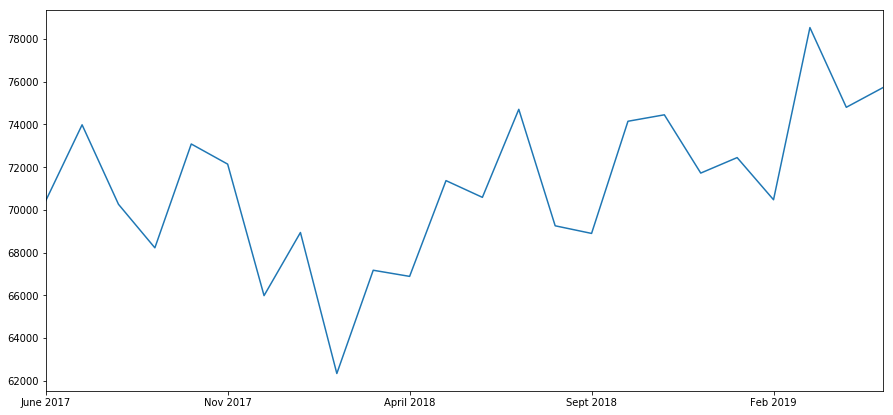

In [23]:
#Crime per each month line graph
Crime_category_total.select_dtypes(pd.np.number).sum().plot(kind='line', figsize=(15, 7))


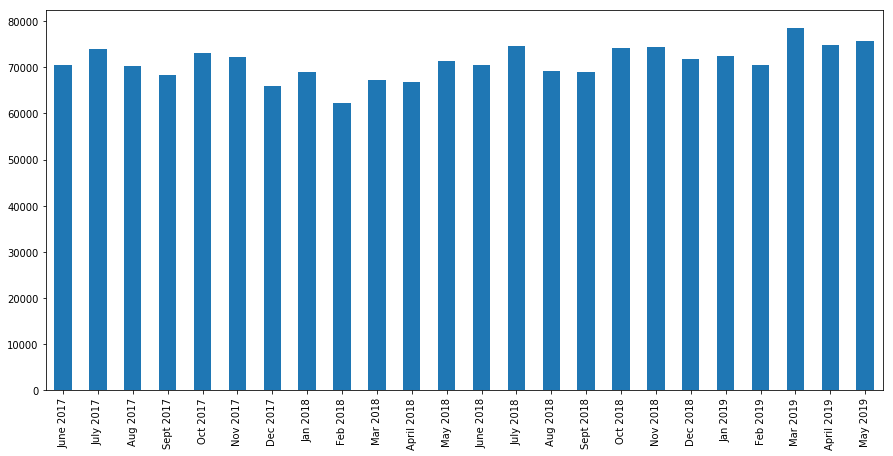

In [24]:
#Crime per each month bar graph
Crime_category_total.select_dtypes(pd.np.number).sum().plot(kind='bar', figsize=(15, 7))


In [25]:
Crime_category_total.shape

(53, 25)

In [26]:
Crime_category_total['Total per crime'] = Crime_category_total.sum(axis=1)
Crime_category_total

,Crime_Category,June 2017,July 2017,Aug 2017,Sept 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,...,Sept 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,April 2019,May 2019,Total per crime
0,Absconding from Lawful Custody,3,1,1,1,3,3,1,4,3,...,4,4,3,3,0,4,1,3,4,71
1,Aggravated Vehicle Taking,73,94,90,100,90,81,93,82,76,...,77,75,77,84,77,59,82,64,88,1915
2,Arson,215,209,137,189,277,244,152,152,160,...,156,167,234,142,159,141,151,179,182,4241
3,Bail Offences,10,2,17,3,9,15,2,6,2,...,4,1,2,6,4,0,3,2,4,142
4,Bicycle Theft,2299,2490,2262,2263,1987,1652,984,1149,1029,...,2189,2146,1551,1108,1302,1186,1463,1691,1918,41091
5,Bigamy,2,2,5,2,1,2,2,1,1,...,1,2,2,0,4,1,1,3,1,42
6,Burglary - Business and Community,1564,1769,1826,1606,1562,1556,1538,1720,1535,...,1706,1869,1649,1654,1838,1702,1824,1734,1795,41112
7,Burglary - Residential,4168,4447,4443,4439,5167,5792,5451,5923,5065,...,4385,5281,6237,5506,5622,4979,5405,4585,4565,118801
8,Concealing an Infant Death Close to Birth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,Criminal Damage,5122,5270,5039,4773,5148,4953,4592,4782,4113,...,4318,4646,4487,4551,4392,4228,4802,4547,4615,112206


In [27]:
# 10 Boroughs with Least number of crimes 
BCT10 = Borough_Crime_total[['Borough', 'Total_per_crime']].groupby(
    ['Borough'], as_index=False).sum().sort_values(
    'Total_per_crime', ascending=True).head(10)
BCT10

,Borough,Total_per_crime
22,London Heathrow and London City Airports,6933
19,Kingston upon Thames,24671
28,Sutton,24967
26,Richmond upon Thames,26007
23,Merton,27810
13,Harrow,30135
2,Bexley,31734
0,Barking and Dagenham,37657
14,Havering,37828
18,Kensington and Chelsea,44647


In [28]:
#10 Boroughs with maximum number of crimes 
BCT_10least = Borough_Crime_total[['Borough', 'Total_per_crime']].groupby(
    ['Borough'], as_index=False).sum().sort_values(
    'Total_per_crime', ascending=False).head(10)
BCT_10least

,Borough,Total_per_crime
32,Westminster,131737
5,Camden,75318
27,Southwark,72467
24,Newham,71452
20,Lambeth,70779
29,Tower Hamlets,67179
10,Hackney,63489
12,Haringey,62709
6,Croydon,62458
3,Brent,61230


In [29]:
# What Crimes are the 10 most commonly occuring ones 
Crime_category_total[['Crime_Category', 'Total per crime']].groupby(
    ['Crime_Category'], as_index=False).sum().sort_values(
    'Total per crime', ascending=False).head(10)

,Crime_Category,Total per crime
50,Violence without Injury,265110
28,Other Theft,235221
49,Violence with Injury,155162
46,Theft from a Motor Vehicle,132708
7,Burglary - Residential,118801
9,Criminal Damage,112206
45,Theft from Person,94864
43,Shoplifting,89888
32,Possession of Drugs,70456
38,Public Fear Alarm or Distress,67074


In [30]:
# What Crimes are the 10 least commonly occuring ones 
Crime_category_total[['Crime_Category', 'Total per crime']].groupby(
    ['Crime_Category'], as_index=False).sum().sort_values(
    'Total per crime', ascending=True).head(10)

,Crime_Category,Total per crime
8,Concealing an Infant Death Close to Birth,1
52,Wildlife Crime,29
23,Other Firearm Offences,33
5,Bigamy,42
29,Perjury,44
13,Exploitation of Prostitution,56
0,Absconding from Lawful Custody,71
14,Forgery or Use of Drug Prescription,105
51,Violent Disorder,116
11,"Disclosure, Obstruction, False or Misleading S...",128


In [31]:
# Create a list of the 10 most commonly occuring crimes
top_crimes = Crime_category_total[['Crime_Category', 'Total per crime']].groupby(
    ['Crime_Category'], as_index=False).sum().sort_values(
    'Total per crime', ascending=False).head(10)

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = Crime_category_total[['Crime_Category', 'Total per crime']].groupby(
    ['Crime_Category'], as_index=False).sum().sort_values(
    'Total per crime', ascending=False).head(3)

# Create a list of the 2 most commonly occuring crimes
top_two_crimes = Crime_category_total[['Crime_Category', 'Total per crime']].groupby(
    ['Crime_Category'], as_index=False).sum().sort_values(
    'Total per crime', ascending=False).head(2)

Considering that the safest Borough is Kingston upon Thames. I explored the neighbourhoods around Kingston upon Thames and the most common venues around those areas. 

In [32]:
#Foursquare Credentials 
CLIENT_ID = 'X54UHO5DJQHHNWX2INMX2TPWU0JW0RXS5WH1QAQ0KFBQ5RYW'
CLIENT_SECRET = '15LBWP0UTB4O1S5R4GPJWQPMDGQWOJZEVBNW32OP0STKWTIH'
VERSION = '20190719'

In [33]:
address = 'London, United Kingdom'
geolocator = Nominatim(user_agent="CapstoneAssignment")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Geograpical coordinates of London are {}, {}.'.format(latitude, longitude))


Geograpical coordinates of London are 51.5073219, -0.1276474.


In [35]:
# Define Chicago's geolocation coordinates
London_latitude = 51.5073219  
London_longitude = -0.1276474

# Define the world map centered around Chicago with a higher zoom level
London_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# display world map
London_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng in zip(df_all.Latitude, df_all.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
London_map.add_child(incidents)

In [36]:
KUT_data = df_all[df_all['Borough'] == 'Kingston upon Thames'].reset_index(drop=True)
add_KUT = 'Kingston upon Thames,London'

geolocator1 = Nominatim(user_agent="CourseraAssignment")
location1 = geolocator1.geocode(add_KUT)
lat = location1.latitude
lng = location1.longitude
print('Geograpical coordinates of Kingston upon Thames are {}, {}.'.format(lat, lng))

Geograpical coordinates of Kingston upon Thames are 51.4096275, -0.3062621.


In [37]:
Neighborhood = ['Berrylands','Canbury', 'Chessington','Coombe','Kingston upon Thames','Kingston Vale','Malden Rushett',
                'Motspur Park', 'New Malden', 'Norbiton','Old Malden','Surbiton','Tolworth']
                
Borough = ['Kingston upon Thames','Kingston upon Thames', 'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames',
           'Kingston upon Thames', 'Kingston upon Thames', 'Kingston upon Thames','Kingston upon Thames','Kingston upon Thames','Kingston upon Thames']

Latitude = ['','','','','','','','','','','','','']
Longitude = ['','','','','','','','','','','','','']

df_kut = {'Borough':Borough,'Neighborhood': Neighborhood,'Latitude': Latitude,'Longitude':Longitude}
KUT_df = pd.DataFrame(data=df_kut, columns=['Borough','Neighborhood','Latitude', 'Longitude'], index=None)

KUT_df

,Borough,Neighborhood,Latitude,Longitude
0,Kingston upon Thames,Berrylands,,
1,Kingston upon Thames,Canbury,,
2,Kingston upon Thames,Chessington,,
3,Kingston upon Thames,Coombe,,
4,Kingston upon Thames,Kingston upon Thames,,
5,Kingston upon Thames,Kingston Vale,,
6,Kingston upon Thames,Malden Rushett,,
7,Kingston upon Thames,Motspur Park,,
8,Kingston upon Thames,New Malden,,
9,Kingston upon Thames,Norbiton,,


In [38]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)

neighborhood_latitude = KUT_data.loc[0, 'Latitude'] 
neighborhood_longitude = KUT_data.loc[0, 'Longitude'] 

neighborhood_name = KUT_df.loc[0, 'Neighborhood'] 
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Berrylands are 51.4085, 0.3064.


In [39]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},London,United Kingdom'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="Capstone_Project",timeout=10)
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[51.4018122, 51.41749865, 51.358336, 51.4194499, 51.4096275, 51.43185, 51.3410523, 51.3909852, 51.4053347, 51.4099994, 51.382484, 51.3937557, 51.3788758] [-0.2259413, -0.305552805049262, -0.2986216, -0.2653985, -0.3062621, -0.2581379, -0.3190757, -0.2488979, -0.2634066, -0.2873963, -0.2590897, -0.3033105, -0.2828604]


In [40]:
df_kut = {'Borough':Borough,'Neighborhood': Neighborhood,'Latitude': Latitude,'Longitude':Longitude}
KUT_df = pd.DataFrame(data=df_kut, columns=['Borough','Neighborhood','Latitude', 'Longitude'], index=None)

KUT_df


,Borough,Neighborhood,Latitude,Longitude
0,Kingston upon Thames,Berrylands,51.401812,-0.225941
1,Kingston upon Thames,Canbury,51.417499,-0.305553
2,Kingston upon Thames,Chessington,51.358336,-0.298622
3,Kingston upon Thames,Coombe,51.419450,-0.265398
4,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
5,Kingston upon Thames,Kingston Vale,51.431850,-0.258138
6,Kingston upon Thames,Malden Rushett,51.341052,-0.319076
7,Kingston upon Thames,Motspur Park,51.390985,-0.248898
8,Kingston upon Thames,New Malden,51.405335,-0.263407
9,Kingston upon Thames,Norbiton,51.409999,-0.287396


In [41]:
#Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Kingston Market Place,Market,51.409600,-0.306265
1,Banquet Records,Record Shop,51.409080,-0.303382
2,Rose Theatre,Theater,51.408557,-0.307327
3,The Ram,Pub,51.408149,-0.307768
4,Waitrose & Partners,Supermarket,51.411323,-0.305760
5,Côte Brasserie,French Restaurant,51.410510,-0.308183
6,Woody's Bar & Kitchen,Pub,51.408436,-0.308465
7,Local Hero,Café,51.410753,-0.306694
8,Fortunella,Café,51.409257,-0.305709
9,Byron,Burger Joint,51.409484,-0.307768


In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
KUT_venues = getNearbyVenues(names=KUT_df['Neighborhood'],
                                   latitudes=KUT_df['Latitude'],
                                   longitudes=KUT_df['Longitude']
                                  )

Berrylands
Canbury
Chessington
Coombe
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Surbiton
Tolworth


In [45]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [46]:
KUT_venues.shape

(217, 7)

In [47]:
KUT_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berrylands,51.401812,-0.225941,David Lloyd Raynes Park,51.405710,-0.222342,Gym / Fitness Center
1,Berrylands,51.401812,-0.225941,Prince George's Playing Fields,51.403985,-0.227880,Soccer Field
2,Berrylands,51.401812,-0.225941,Joseph Hood Playground,51.404125,-0.220595,Playground
3,Berrylands,51.401812,-0.225941,Westway,51.398434,-0.230233,Road
4,Canbury,51.417499,-0.305553,Canbury Gardens,51.417409,-0.305300,Park
5,Canbury,51.417499,-0.305553,The Boater's Inn,51.418546,-0.305915,Pub
6,Canbury,51.417499,-0.305553,The Grey Horse,51.414192,-0.300759,Pub
7,Canbury,51.417499,-0.305553,DoubleTree by Hilton Hotel London Kingston upo...,51.413548,-0.305378,Hotel
8,Canbury,51.417499,-0.305553,Pisces Fish Kitchen (Kingston),51.414803,-0.300782,Fish & Chips Shop
9,Canbury,51.417499,-0.305553,Cakewalk Patisserie & Coffee House,51.418626,-0.301704,Café


In [48]:
KUT_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berrylands,4,4,4,4,4,4
Canbury,14,14,14,14,14,14
Chessington,2,2,2,2,2,2
Kingston Vale,4,4,4,4,4,4
Kingston upon Thames,100,100,100,100,100,100
Malden Rushett,4,4,4,4,4,4
Motspur Park,4,4,4,4,4,4
New Malden,9,9,9,9,9,9
Norbiton,25,25,25,25,25,25


In [49]:
print('There are {} uniques categories.'.format(len(KUT_venues['Venue Category'].unique())))

There are 93 uniques categories.


In [50]:
# one hot encoding
KUT_onehot = pd.get_dummies(KUT_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
KUT_onehot['Neighborhood'] = KUT_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [KUT_onehot.columns[-1]] + list(KUT_onehot.columns[:-1])
KUT_onehot = KUT_onehot[fixed_columns]

KUT_grouped = KUT_onehot.groupby('Neighborhood').mean().reset_index()
KUT_grouped

,Neighborhood,Arts & Crafts Store,Asian Restaurant,Auto Garage,Bakery,Bar,Bistro,Bookstore,Bowling Alley,Breakfast Spot,...,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Shop,Women's Store
0,Berrylands,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
1,Canbury,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
2,Chessington,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
3,Kingston Vale,0.00,0.00,0.00,0.000000,0.250000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
4,Kingston upon Thames,0.01,0.01,0.00,0.020000,0.010000,0.000000,0.02,0.0000,0.000000,...,0.030000,0.000000,0.010000,0.01,0.000000,0.01,0.01,0.01,0.000000,0.01
5,Malden Rushett,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
6,Motspur Park,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
7,New Malden,0.00,0.00,0.00,0.000000,0.111111,0.000000,0.00,0.0000,0.000000,...,0.111111,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00
8,Norbiton,0.00,0.00,0.04,0.000000,0.000000,0.000000,0.00,0.0000,0.040000,...,0.000000,0.000000,0.040000,0.00,0.000000,0.00,0.00,0.00,0.040000,0.00
9,Old Malden,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.250000,0.00,0.00,0.00,0.000000,0.00


Then, we get the most common venues per neighborhood

In [51]:
num_top_venues = 5

for hood in KUT_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = KUT_grouped[KUT_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berrylands----
                  venue  freq
0  Gym / Fitness Center  0.25
1                  Road  0.25
2            Playground  0.25
3          Soccer Field  0.25
4   Arts & Crafts Store  0.00


----Canbury----
                  venue  freq
0                   Pub  0.29
1                 Hotel  0.07
2     Indian Restaurant  0.07
3  Gym / Fitness Center  0.07
4                 Plaza  0.07


----Chessington----
                  venue  freq
0         Grocery Store   0.5
1  Fast Food Restaurant   0.5
2   Arts & Crafts Store   0.0
3                  Park   0.0
4                   Pub   0.0


----Kingston Vale----
                 venue  freq
0   Italian Restaurant  0.25
1                  Bar  0.25
2        Grocery Store  0.25
3         Soccer Field  0.25
4  Arts & Crafts Store  0.00


----Kingston upon Thames----
                venue  freq
0         Coffee Shop  0.10
1  Italian Restaurant  0.08
2                Café  0.07
3                 Pub  0.05
4      Clothing Store  0.04


--

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = KUT_grouped['Neighborhood']

for ind in np.arange(KUT_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(KUT_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Playground,Road,Soccer Field,Falafel Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner
1,Canbury,Pub,Indian Restaurant,Park,Shop & Service,Café,Spa,Fish & Chips Shop,Supermarket,Plaza,Hotel
2,Chessington,Fast Food Restaurant,Grocery Store,Women's Store,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant
3,Kingston Vale,Grocery Store,Bar,Italian Restaurant,Soccer Field,Fast Food Restaurant,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store
4,Kingston upon Thames,Coffee Shop,Italian Restaurant,Café,Pub,Clothing Store,Department Store,Sushi Restaurant,Hotel,Ice Cream Shop,Bakery


K-Means Clustering

In [54]:
kclusters = 4

KUT_grouped_clustering = KUT_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(KUT_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 1, 0, 0, 0, 2, 0, 0, 0])

In [62]:
KUT_merged = KUT_df

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
KUT_merged = KUT_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
KUT_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kingston upon Thames,Berrylands,51.401812,-0.225941,3.0,Gym / Fitness Center,Playground,Road,Soccer Field,Falafel Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner
1,Kingston upon Thames,Canbury,51.417499,-0.305553,0.0,Pub,Indian Restaurant,Park,Shop & Service,Café,Spa,Fish & Chips Shop,Supermarket,Plaza,Hotel
2,Kingston upon Thames,Chessington,51.358336,-0.298622,1.0,Fast Food Restaurant,Grocery Store,Women's Store,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant
3,Kingston upon Thames,Coombe,51.419450,-0.265398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0.0,Coffee Shop,Italian Restaurant,Café,Pub,Clothing Store,Department Store,Sushi Restaurant,Hotel,Ice Cream Shop,Bakery
5,Kingston upon Thames,Kingston Vale,51.431850,-0.258138,0.0,Grocery Store,Bar,Italian Restaurant,Soccer Field,Fast Food Restaurant,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store
6,Kingston upon Thames,Malden Rushett,51.341052,-0.319076,0.0,Convenience Store,Garden Center,Restaurant,Pub,Gastropub,German Restaurant,Deli / Bodega,Gift Shop,Department Store,Dessert Shop
7,Kingston upon Thames,Motspur Park,51.390985,-0.248898,2.0,Gym,Construction & Landscaping,Park,Soccer Field,Women's Store,Falafel Restaurant,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner
8,Kingston upon Thames,New Malden,51.405335,-0.263407,0.0,Gym,Grocery Store,Gastropub,Bar,Indian Restaurant,Sushi Restaurant,Supermarket,Chinese Restaurant,Korean Restaurant,Farmers Market
9,Kingston upon Thames,Norbiton,51.409999,-0.287396,0.0,Food,Indian Restaurant,Italian Restaurant,Platform,Pub,Hardware Store,Seafood Restaurant,Grocery Store,Wine Shop,Hotel


In [63]:
KUT_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
Borough                   13 non-null object
Neighborhood              13 non-null object
Latitude                  13 non-null float64
Longitude                 13 non-null float64
Cluster Labels            12 non-null float64
1st Most Common Venue     12 non-null object
2nd Most Common Venue     12 non-null object
3rd Most Common Venue     12 non-null object
4th Most Common Venue     12 non-null object
5th Most Common Venue     12 non-null object
6th Most Common Venue     12 non-null object
7th Most Common Venue     12 non-null object
8th Most Common Venue     12 non-null object
9th Most Common Venue     12 non-null object
10th Most Common Venue    12 non-null object
dtypes: float64(3), object(12)
memory usage: 1.6+ KB


In [64]:
# Dropping the row with the NaN value 
KUT_merged.dropna(inplace = True)

In [65]:
KUT_merged.shape

(12, 15)

In [66]:
KUT_merged['Cluster Labels'] = KUT_merged['Cluster Labels'].astype(int)

In [67]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(KUT_merged['Latitude'], KUT_merged['Longitude'], KUT_merged['Neighborhood'], KUT_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [68]:
KUT_merged[KUT_merged['Cluster Labels'] == 0]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kingston upon Thames,Canbury,51.417499,-0.305553,0,Pub,Indian Restaurant,Park,Shop & Service,Café,Spa,Fish & Chips Shop,Supermarket,Plaza,Hotel
4,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,0,Coffee Shop,Italian Restaurant,Café,Pub,Clothing Store,Department Store,Sushi Restaurant,Hotel,Ice Cream Shop,Bakery
5,Kingston upon Thames,Kingston Vale,51.431850,-0.258138,0,Grocery Store,Bar,Italian Restaurant,Soccer Field,Fast Food Restaurant,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store
6,Kingston upon Thames,Malden Rushett,51.341052,-0.319076,0,Convenience Store,Garden Center,Restaurant,Pub,Gastropub,German Restaurant,Deli / Bodega,Gift Shop,Department Store,Dessert Shop
8,Kingston upon Thames,New Malden,51.405335,-0.263407,0,Gym,Grocery Store,Gastropub,Bar,Indian Restaurant,Sushi Restaurant,Supermarket,Chinese Restaurant,Korean Restaurant,Farmers Market
9,Kingston upon Thames,Norbiton,51.409999,-0.287396,0,Food,Indian Restaurant,Italian Restaurant,Platform,Pub,Hardware Store,Seafood Restaurant,Grocery Store,Wine Shop,Hotel
10,Kingston upon Thames,Old Malden,51.382484,-0.259090,0,Train Station,Child Care Service,Food,Pub,Women's Store,Falafel Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop
11,Kingston upon Thames,Surbiton,51.393756,-0.303310,0,Coffee Shop,Pub,Italian Restaurant,Supermarket,Gastropub,Breakfast Spot,Pharmacy,Pizza Place,Deli / Bodega,Farmers Market
12,Kingston upon Thames,Tolworth,51.378876,-0.282860,0,Grocery Store,Soccer Field,Indian Restaurant,Pharmacy,Discount Store,Coffee Shop,Restaurant,Sandwich Place,Bus Stop,Pizza Place


In [69]:
KUT_merged[KUT_merged['Cluster Labels'] == 1]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Kingston upon Thames,Chessington,51.358336,-0.298622,1,Fast Food Restaurant,Grocery Store,Women's Store,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant


In [70]:
KUT_merged[KUT_merged['Cluster Labels'] == 2]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kingston upon Thames,Motspur Park,51.390985,-0.248898,2,Gym,Construction & Landscaping,Park,Soccer Field,Women's Store,Falafel Restaurant,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner


In [71]:
KUT_merged[KUT_merged['Cluster Labels'] == 3]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kingston upon Thames,Berrylands,51.401812,-0.225941,3,Gym / Fitness Center,Playground,Road,Soccer Field,Falafel Restaurant,Department Store,Dessert Shop,Discount Store,Donut Shop,Dry Cleaner


##### Results and Discussion

This project will be useful for those considering to relocate to London. It will make it easy to choose the safest borough in London. For a family, cluster 0 wuth the train station, park seems to be appropriate. The clusters show the common venues in the neighbourhood. 

##### Conclusion 

In this project, I have considered only the safety factors, but other factors such as the cost of living, the quality of schools and many more could be considered. I also feel probably developing a model or an app where you can enter the name of a borough and get all the information when you click on various tabs such as transport, schools, restaurants etc.  